# 개요 

### Author : HYGN

### 긴급재난지원금의 목적 
  
    : 코로나19 장기화로 어려움을 겪는 국민에 대한 다층적이고 시급한 지원.
    : '국민생활 안정'과 '경제회복 지원'.
    

### KOSIS 코로나 19 월별통계표 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_COVID19_005_M

# Data 소개   

    YM : 기준년월   
    SIDO : 지역대분류명   
    SIGUNGU : 지역중분류명   
    FranClass : 소상공인구분   
    Type : 업종명   
    Time : 시간대   
    TotalSpent : 총사용금액(재난지원금 포함)
    DisSpent : 재난지원금 사용금액   
    NumOfSpent : 총 이용건수   
    NumOfDisSpent : 총 재난지원금 이용건수   
    POINT_X, POINT_Y : X,Y 좌표   


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [4]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
os.listdir("../../data/kri-dac-jeju")

['데이터 정의서-Grid view.csv',
 'KRI-DAC_Jeju_data6.txt',
 'nycflights.csv',
 'KRI-DAC_Jeju_data7.txt',
 'KRI-DAC_Jeju_data5.txt',
 '좌표체계-Grid view.csv',
 '코로나_19_발생현황__국내__월__20201215135914.csv',
 'KRI-DAC_Jeju_data8.txt']

In [6]:
os.chdir("../../data/kri-dac-jeju")

In [7]:
import glob

path = "./*.txt"
flist = glob.glob(path)
flist = sorted(flist)
flist

['./KRI-DAC_Jeju_data5.txt',
 './KRI-DAC_Jeju_data6.txt',
 './KRI-DAC_Jeju_data7.txt',
 './KRI-DAC_Jeju_data8.txt']

## 5월

In [8]:
dat5 = pd.read_csv(flist[0])
dat5.columns = dat5.columns.str.lower()
dat5.shape

(273183, 14)

## 6월

In [9]:
dat6 = pd.read_csv(flist[1])
dat6.columns = dat6.columns.str.lower()
dat6.shape

(281896, 14)

## 7월

In [10]:
dat7 = pd.read_csv(flist[2])
dat7.columns = dat7.columns.str.lower()
dat7.shape

(284265, 16)

## 8월

In [11]:
dat8 = pd.read_csv(flist[3])
dat8.columns = dat8.columns.str.lower()
dat8.shape

(280085, 14)

## 자료 key값

: 동일한 지점좌표에 여러 업종이 기록되어 있었습니다. 이는 한 건물 내에 여러 업종이 자리하고 있어 그런 것으로 보이며, 자료들의 구분 key값을 (업종,x,y)를 이용하는게 적합하다고 생각합니다.

In [12]:
dat5[dat5['point_x']==877005.9834].head(10)

,objectid,field1,ym,sido,sigungu,franclass,type,time,totalspent,disspent,numofspent,numofdisspent,point_x,point_y
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1479766.073
4903,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1479766.073
8568,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1479766.073
11269,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1479766.073
19121,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1479766.073
23348,23349,23349,202005,제주특별자치도,제주시,영세,의원,08시,1500,0,1,0,877005.9834,1479766.073
23349,23350,23350,202005,제주특별자치도,제주시,중소,한의원,08시,24000,0,10,0,877005.9834,1479766.073
30280,30281,30281,202005,제주특별자치도,제주시,영세,의원,09시,98000,33000,3,2,877005.9834,1479766.073
30281,30282,30282,202005,제주특별자치도,제주시,중소,한의원,09시,10000,0,2,0,877005.9834,1479766.073
40793,40794,40794,202005,제주특별자치도,제주시,영세,의원,10시,70500,1500,3,1,877005.9834,1479766.073


## 자료 병합

: 5~8월까지의 시간적 변화를 같이 고려하기 위해 모든 자료를 병합하여 이용하였습니다.

In [13]:
spent = ['totalspent','disspent','numofspent','numofdisspent']
keyvar = ['type','time','point_x','point_y']
idvar = ['objectid','field1','sigungu','franclass']

In [14]:
tmp1 = dat5.merge(dat6[keyvar+spent],on=keyvar,suffixes=['_5','_6'],how='inner')
tmp2 = dat7[keyvar+spent].merge(dat8[keyvar+spent],on=keyvar,suffixes=['_7','_8'],how='inner')

tmp = tmp1.merge(tmp2,on=keyvar,how='inner')
tmp = tmp.drop('sido',axis=1)
# tmp = tmp[tmp['time']!='x시']
tmp.head()

del tmp1,tmp2

In [15]:
tmp.shape

(454728, 25)

### 결측값 확인

In [16]:
import missingno

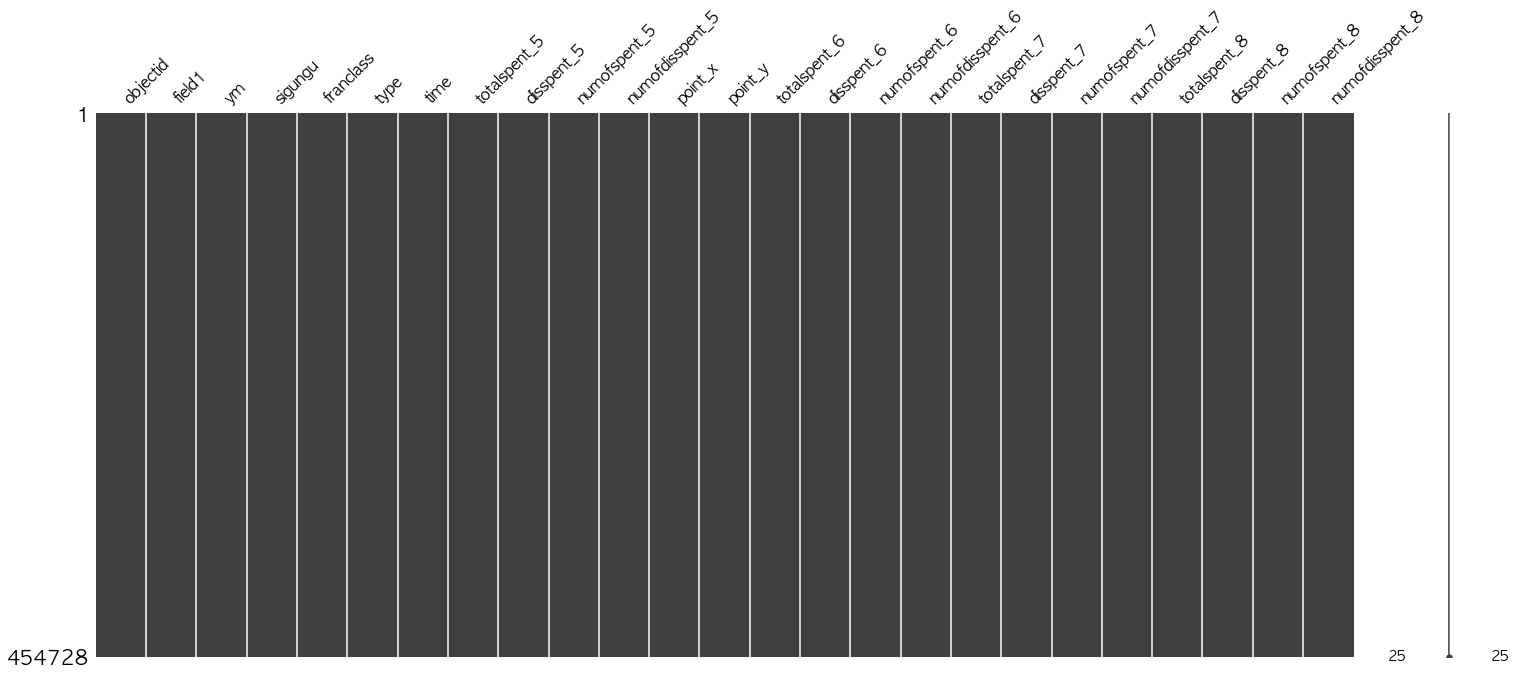

In [17]:
missingno.matrix(tmp);

## 재난지원금 총 사용금액

: "사람들은 재난지원금을 어떤 업종에 가장 많이 사용했을까?"

In [18]:
var1=[]
var2=[]
var3=[]
var4=[]
for i in range(5,9):
    var1.append("_".join(["disspent",str(i)]))
    var2.append("_".join(["totalspent",str(i)]))
    var3.append("_".join(["numofdisspent",str(i)]))
    var4.append("_".join(["numofspent",str(i)]))

In [19]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum')

In [20]:
df_month = df1.apply(np.sum,axis=0)

In [21]:
tot_disspent = np.sum(df_month[:4])
tot_numofdisspent = np.sum(df_month[4:8])
tot_numofspent = np.sum(df_month[8:12])
tot_spent = np.sum(df_month[12:16])

In [22]:
df1 = tmp.pivot_table(index=['type'],values=var1+var2+var3+var4,aggfunc='sum')
tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1[tmp1 != 0]

tmp1 = tmp1/tot_disspent  
tmp1 = pd.concat([tmp1[tmp1>0.015],pd.Series(1-np.sum(tmp1[tmp1>0.015].values),index=['etc'])])

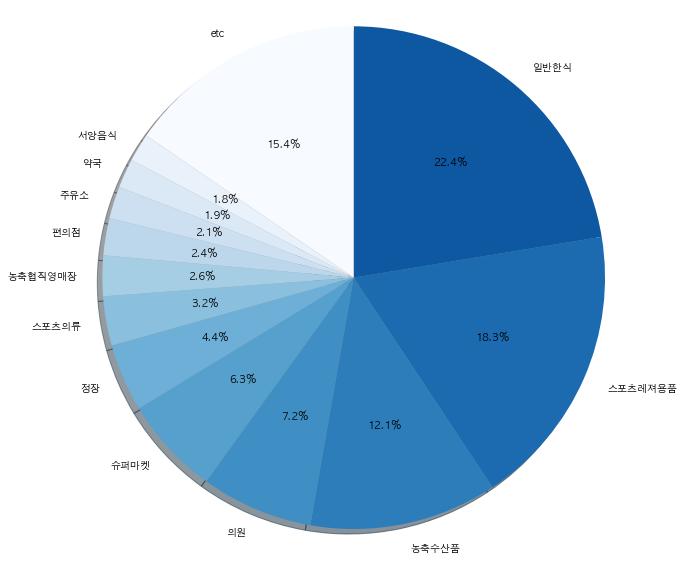

In [23]:
cmap = plt.get_cmap("Blues")
colors = cmap(sorted(np.arange(13)*18,reverse=True))

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(tmp1,labels=tmp1.index, autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock=False,colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

: 제주도의 5~8월 (1차)재난지원금의 사용처를 확인한 결과, 음식&식품 관련 업종에서 재난지원금 총 사용금액의 약 47.6%가 사용되었습니다. 

: 이와 관련된 [기사](https://www.hankyung.com/economy/article/202008249143i) 중 에서는 재난지원금이 먹거리 지출에 사용된 현상에 대해, "지원금으로 농식품을 구매한만큼 기존 지출을 줄였을 것이란 분석이다. 결국 재난지원금이 새로운 소비를 일으키지 못하고 기존 소비를 대체하는 정도에 그쳤다고 해석할 수 있다."라는 의견이 있습니다.

In [24]:
tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=True)
tmp1[tmp1!=0][:20]

type
택시          8500
기타광학품       9600
견인서비스      32500
학습지교육      51580
기타교통수단     90000
유아원       105110
산후조리원     112350
신변잡화수리    190000
과학기자재     208000
화랑        215000
소프트웨어     226700
기타서적문구    226940
유리        250787
양품점       328000
제화점       328000
기타연료      336432
중장비수리     444130
기타보험      669630
보관창고업     718480
악기점       786250
dtype: int64

: 재난지원금 총 사용금액이 낮은 업종의 경우, 대부분 실생활 이외의 부가적인 지출에 대한 업종이 많아보입니다.

## '일반한식' 업종, 월별 경향성 확인

: 재난지원금의 사용금액이 가장 많았던 '일반한식'업종에 대해서 알아봤습니다. 

In [25]:
def fig_timevarying(types,varname,gtype='line',**kwargs):
    df = tmp[(tmp['type']==types)].pivot_table(index='time',values=varname,aggfunc='mean').reset_index()
    if(gtype=='line'):
        sns.lineplot(data=df.melt(id_vars=['time']),x='time',y='value',hue='variable',**kwargs);
    if(gtype=='bar'):
        sns.barplot(data=df.melt(id_vars=['time']),x='time',y='value',hue='variable',**kwargs);

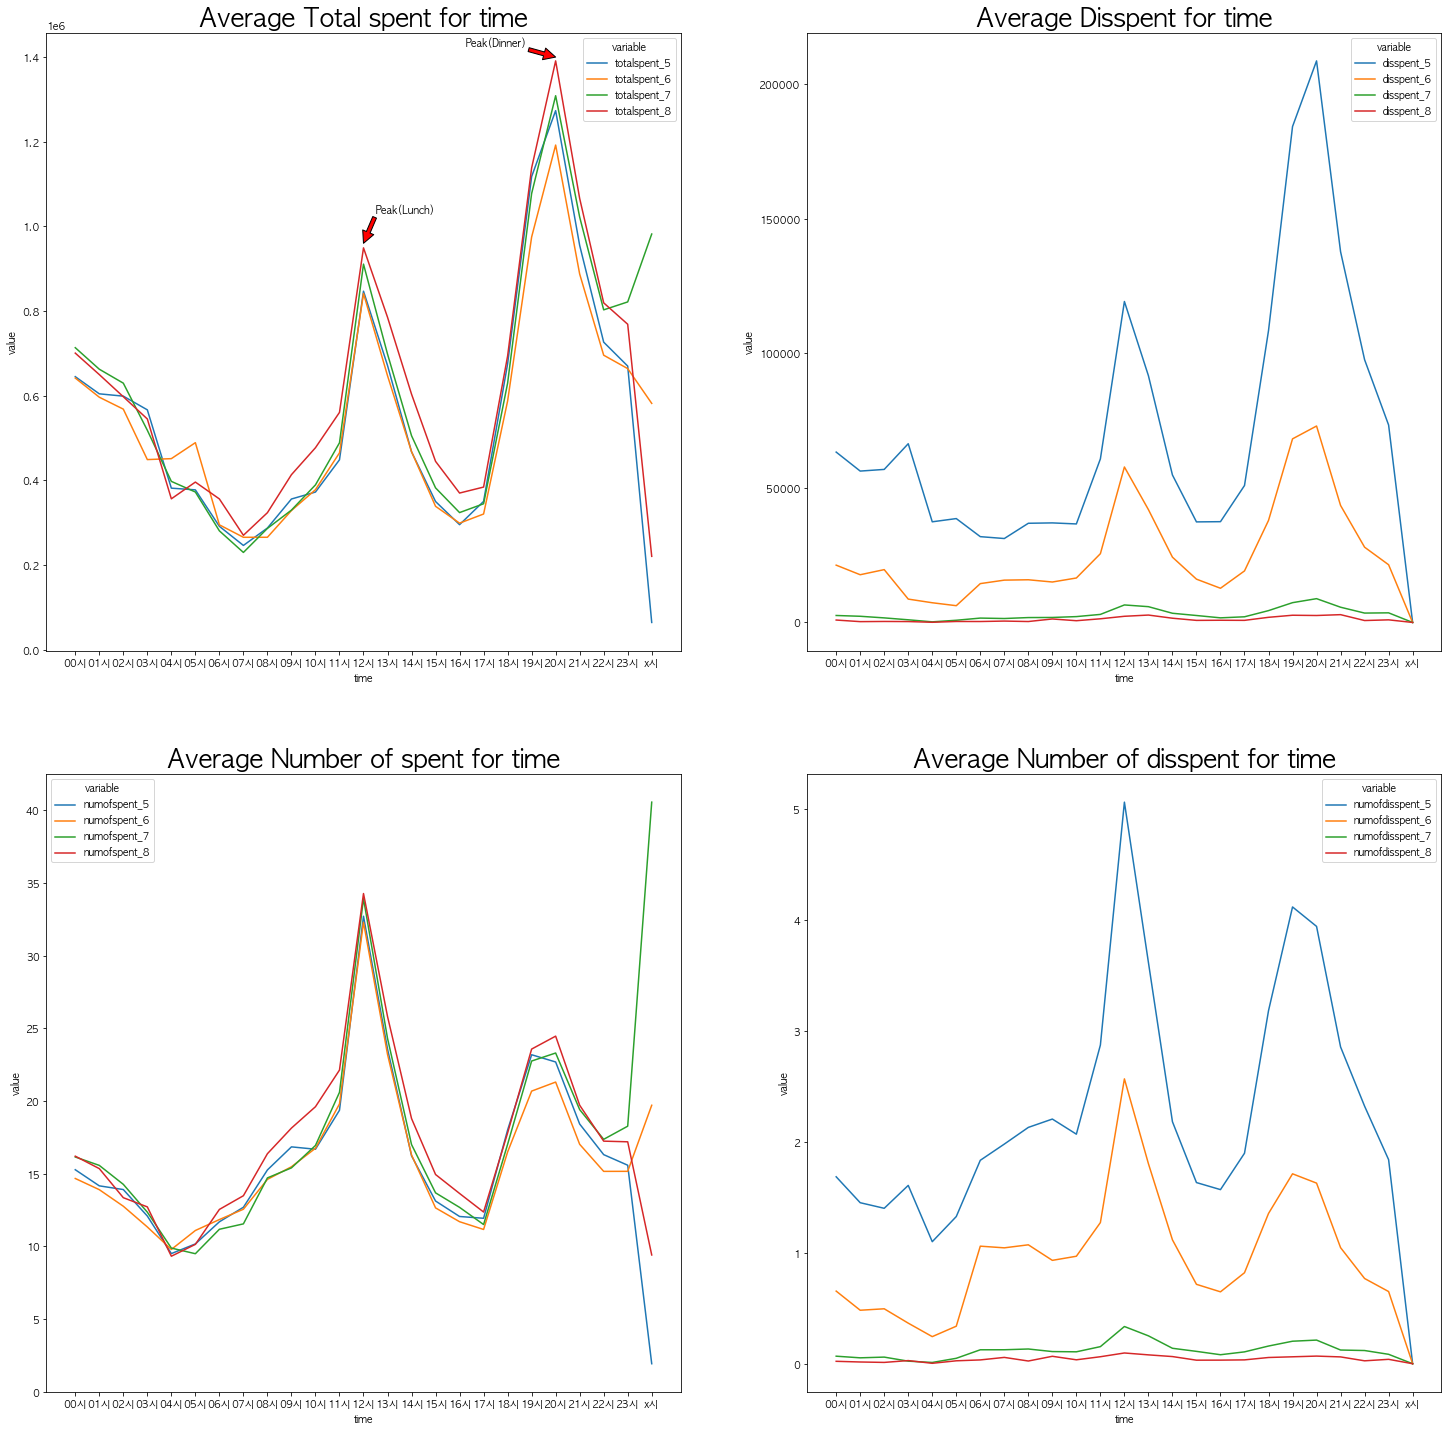

In [26]:
fig,axes = plt.subplots(2,2,figsize=(25,25))
fig_timevarying('일반한식',var1,ax=axes[0,1])
fig_timevarying('일반한식',var2,ax=axes[0,0])
fig_timevarying('일반한식',var3,ax=axes[1,1])
fig_timevarying('일반한식',var4,ax=axes[1,0])

axes[0,0].annotate('Peak(Lunch)', xy=(12, 0.96*1e6), xytext=(12, 1.5*20),textcoords='offset points',
             arrowprops=dict(facecolor='red'));
axes[0,0].annotate('Peak(Dinner)', xy=(20, 1.4*1e6), xytext=(-90, 10),textcoords='offset points',
             arrowprops=dict(facecolor='red'));

axes[0,0].set_title('Average Total spent for time',{'fontsize':25})
axes[0,1].set_title('Average Disspent for time',{'fontsize':25})
axes[1,0].set_title('Average Number of spent for time',{'fontsize':25})
axes[1,1].set_title('Average Number of disspent for time',{'fontsize':25})

plt.show()

: 위 그림은 '일반한식'업종의 월별 시간대에 따른 평균 '총 사용금액'(top-left), '재난지원금사용금액'(top-right), '총 이용건수'(bottom-left), '총 재난 지원금 이용건수'(bottom-right) 입니다.

: '일반한식'의 경우, 5월과 6월의 재난지원금이 활발하게 사용한 것으로 보이고, 점심시간(12시-13시)과 저녁시간(19시-20시)에 이용건수와 금액이 높게 나타납니다. 

: 전체 사용금액과 이용건수의 패턴은 5~8월까지 경향성이 비슷합니다. 

: 전체적인 경향은 유사하지만 재난지원금의 사용이 5-6월에 활발하므로, 7-8월과의 비교를 통해 어떤 정보를 얻을 수 있을지 생각하고 있습니다.

## 업종별, 월별 경향성 확인

: 위 그래프를 기반으로 업종별, 월별 시간대에 따른 경향성을 확인하는 그래프를 일반화해서 그렸습니다.

In [27]:
!jupyter nbextension enable --user --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [28]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
cf.go_offline(connected=True)

In [29]:
dict_var = {'Total_spent':var2,'DisSpent':var1,'Num_of_spent':var4,'Num_of_disspent':var3}

In [30]:
@interact
def timevarying_plot(Type=sorted(list(tmp['type'].unique())) ,
                 Group=list(dict_var.keys()),
                 Plot_type=['line','bar']
                 ):
    df = tmp[(tmp['type']==Type)].pivot_table(index='time',values=var1+var2+var3+var4,aggfunc='mean').reset_index()
    df.iplot(kind=Plot_type, x='time', y=dict_var[Group],
            xTitle='시간대',yTitle=f'{Group}',
             title = f" '{Type}'의 시간대별 '{Group}'",) 

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…

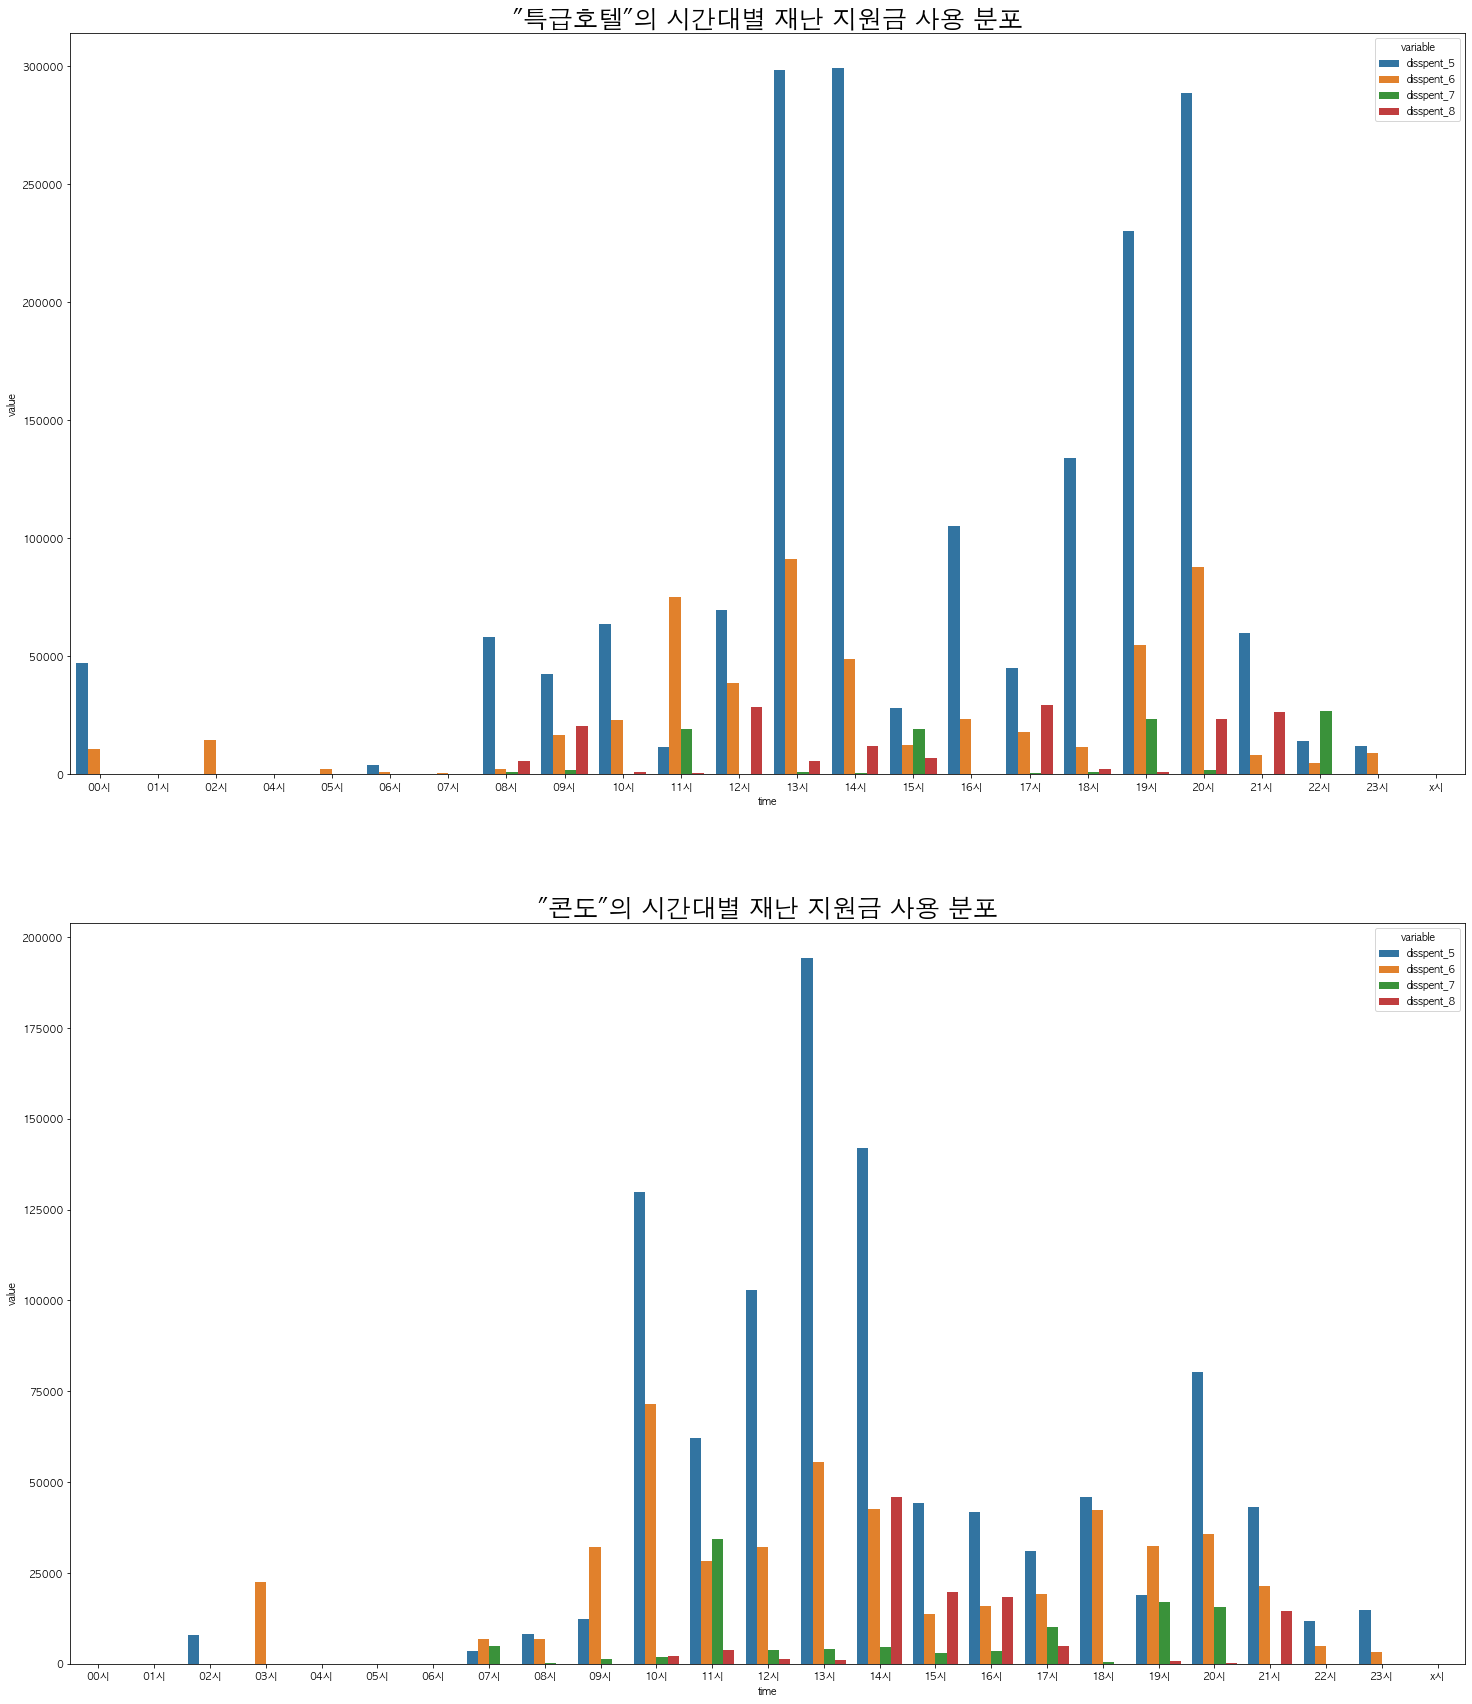

In [31]:
fig,axes = plt.subplots(2,1,figsize=(25,30))
fig_timevarying('특급호텔',var1,ax=axes[0],gtype='bar')
fig_timevarying('콘도',var1,ax=axes[1],gtype='bar')

axes[0].set_title('"특급호텔"의 시간대별 재난 지원금 사용 분포',{'fontsize':25})
axes[1].set_title('"콘도"의 시간대별 재난 지원금 사용 분포',{'fontsize':25})

plt.show()

: 위 결과를 볼 때, 많은 재난지원금이 생활에 필수적인 부분에 대한 소비로 이어진 것을 확인하였습니다.

: 하지만, 개인적인 의견으로는 위와 같이 '재난지원금'의 목적과는 부합하지 않는 소비도 많다는 생각입니다.

## '일반한식' 업종의 규모(소상공인구분)별 재난지원금 비율
: "재난지원금이 업체 규모별로 어떻게 사용되었을까?"

In [32]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
df1 = df1[df1['type'] == '일반한식'].drop(['type'],axis=1).set_index('franclass')

df_month_class = df1.apply(np.sum,axis=0)
tot_disspent_class = np.sum(df_month_class[:4])

tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1/tot_disspent_class  

tmp1 = tmp1.reset_index()
tmp1.columns = ['franclass','proportion']
tmp1.head()

,franclass,proportion
0,영세,0.326341
1,중소1,0.239716
2,중소,0.215570
3,일반,0.114223
4,중소2,0.104150


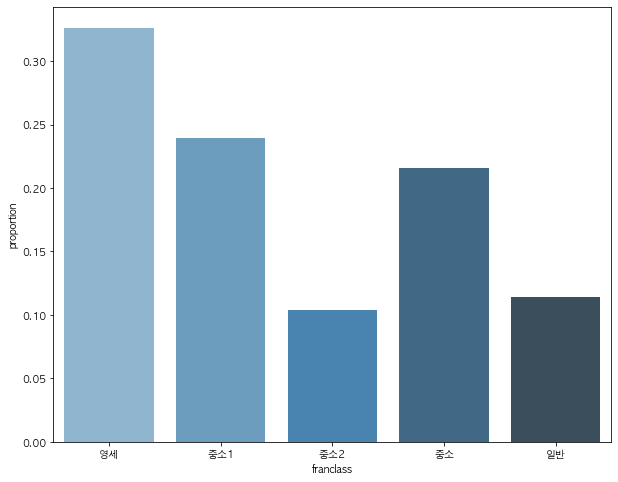

In [33]:
fig,ax = plt.subplots(figsize=(10,8))

sns.barplot(y=tmp1['proportion'],x=tmp1['franclass'], ax=ax, palette="Blues_d", order = ['영세','중소1','중소2','중소','일반']);

## '슈퍼마켓' 업종의 규모(소상공인구분)별 재난지원금 비율
: 슈퍼마켓의 경우, '일반(대형)' 슈퍼마켓에서의 재난지원금 사용비율이 유독 높습니다.

: 아래 확인해 본 결과, '영세' 슈퍼마켓이 별로 없어서 그렇지는 않다. 추가적으로 고려해볼 수 있는 것은 '영세 슈퍼마켓에서의 카드사용 가능여부' 또는 '영세 슈퍼마켓에 대한 접근성', '영세 슈퍼마켓의 물품 종류 차이' 등을 고려해서 확인해봐도 좋다고 생각합니다.

In [34]:
print((tmp[(tmp['type']=='슈퍼마켓')&(tmp['franclass']=='영세')])['point_x'].nunique())
print((tmp[(tmp['type']=='슈퍼마켓')&(tmp['franclass']=='일반')])['point_x'].nunique())

201
80


In [35]:
df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
df1 = df1[df1['type'] == '슈퍼마켓'].drop(['type'],axis=1).set_index('franclass')

df_month_class = df1.apply(np.sum,axis=0)
tot_disspent_class = np.sum(df_month_class[:4])

tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
tmp1 = tmp1/tot_disspent_class  

tmp1 = tmp1.reset_index()
tmp1.columns = ['franclass','proportion']

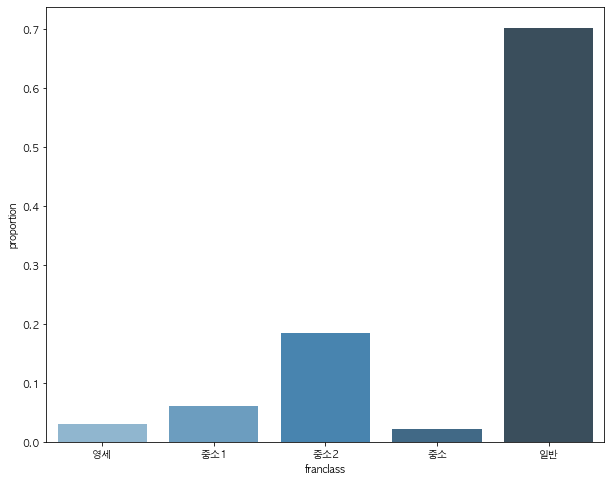

In [36]:
fig,ax = plt.subplots(figsize=(10,8))

sns.barplot(y=tmp1['proportion'],x=tmp1['franclass'], ax=ax, palette="Blues_d", order = ['영세','중소1','중소2','중소','일반']);

## 특정 업종의 규모(소상공인구분)별 재난지원금 비율

In [37]:
from IPython.display import display

In [38]:
@interact
def timevarying_plot2(Type=sorted(list(tmp['type'].unique()))
                     ):
    df1 = tmp.pivot_table(index=['type','franclass'],values=var1+var2+var3+var4,aggfunc='sum').reset_index()
    df1 = df1[df1['type'] == Type].drop(['type'],axis=1).set_index('franclass')
    df_month_class = df1.apply(np.sum,axis=0)
    tot_disspent_class = np.sum(df_month_class[:4])
    
    tmp1 = df1.iloc[:,:4].apply(np.sum,axis=1).sort_values(ascending=False)
    tmp1 = tmp1/tot_disspent_class  

    df = tmp1.reset_index()
    df.columns = ['franclass','proportion']
    df = df.sort_values(['franclass'])
    
    df.iplot(kind='bar', x='franclass', y='proportion',xTitle='소상공인구분',yTitle='재난지원금 사용금액 비율',
             title = f" '{Type}'의 총 재난지원금 사용금액 대비 규모별 비율 ", barmode='stack', colors=['blue']) 

interactive(children=(Dropdown(description='Type', options=('1급호텔', '2급호텔', 'CATV', 'DVD음반테이프판매', 'LPG', '가례서비…